In [1]:
from dotenv import dotenv_values
import httpx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def calculate_average_sma_ratios(df_merged):
    average_sma_ratio_ocean = df_merged['SMA_ratio_ocean'].mean()
    average_sma_ratio_agix = df_merged['SMA_ratio_agix'].mean()
    print(f"average SMA ratio of OCEAN: {average_sma_ratio_ocean}")
    print(f"average SMA ratio of AGIX: {average_sma_ratio_agix}")

In [2]:
def pretty_plot_with_sma(df: pd.DataFrame, token_name: str):
    # Plot the dataframe with the SMA
    df.plot(x='timestamp', y=['prices', 'SMA'], kind='line')
    plt.xlabel(xlabel='Timestamp')
    plt.ylabel(ylabel='Prices')
    plt.title(label=f'SMA of {token_name} in USD')
    plt.legend(['Prices', 'SMA'])
    plt.show()

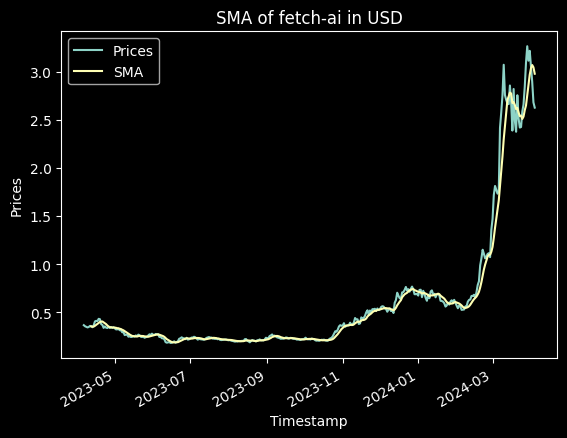

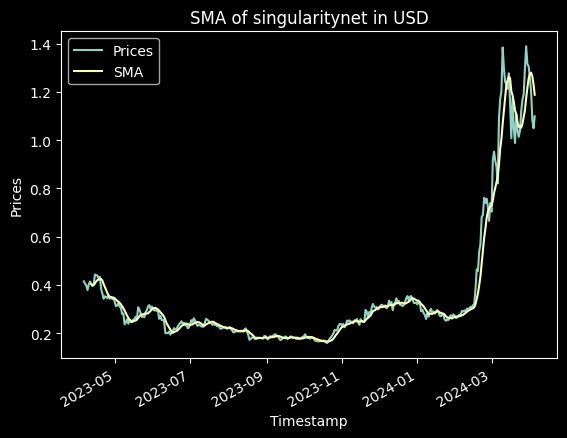

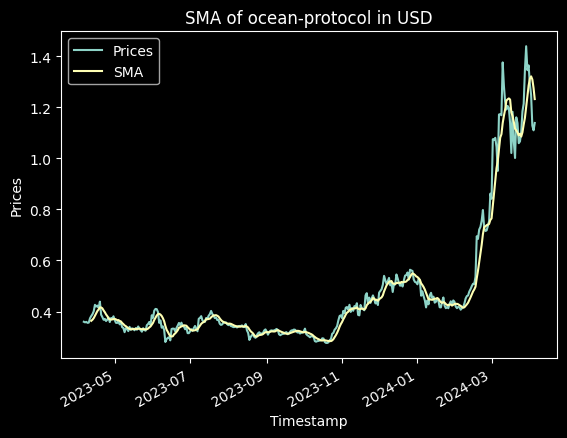

In [3]:
def clean_data(data: dict, rolling_window: int = 30):
    # Initialize an empty DataFrame
    df = pd.DataFrame()

    # Process each category in the JSON data
    for key in data.keys():
        # Convert the data into a temporary DataFrame
        temp_df = pd.DataFrame(data[key], columns=['timestamp', key])
        
        # If our main DataFrame is empty, start it with this category's DataFrame
        if df.empty:
            df = temp_df
        else:
            df = pd.merge(left=df, right=temp_df, on='timestamp', how='outer')
    df['timestamp'] = pd.to_datetime(arg=df['timestamp'], unit='ms')
    df['SMA'] = df['prices'].rolling(window=rolling_window).mean()
    
    return df


def main(token: str):
    api = dotenv_values(dotenv_path=".env")["API_KEY"]
    params = {
        'vs_currency': 'usd',
        'days': '365',
        'interval': 'daily',
        'precision': 'full',
        'x_cg_demo_api_key': api,
    }
    url = f"https://api.coingecko.com/api/v3/coins/{token}/market_chart"
    session = httpx.Client()
    response = session.get(url=url, params=params)
    data = clean_data(data=response.json(), rolling_window=7)
    pretty_plot_with_sma(df=data, token_name = token)
    return data

if __name__ == "__main__":
    df_fetch = main(token="fetch-ai")
    df_agix = main(token="singularitynet")
    df_ocean = main(token="ocean-protocol")
    df_merged = df_agix.merge(right=df_fetch,on='timestamp', suffixes=("_agix", "_fetch")).merge(right=df_ocean,on='timestamp', suffixes=("", "_ocean"))

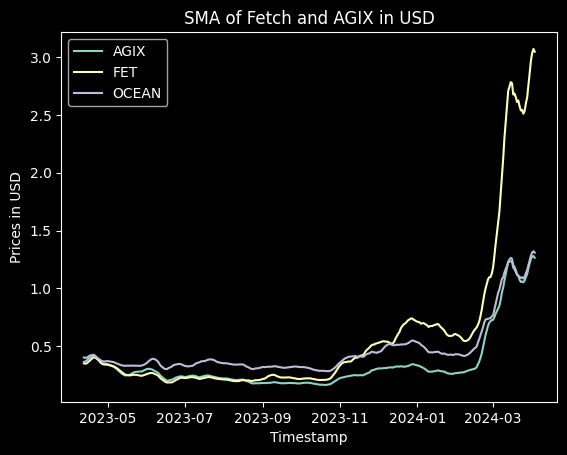

In [5]:
plt.plot(df_merged['timestamp'], df_merged['SMA_agix'], label='AGIX')
plt.plot(df_merged['timestamp'], df_merged['SMA_fetch'], label='FET')
plt.plot(df_merged['timestamp'], df_merged['SMA'], label='OCEAN')
plt.xlabel(xlabel='Timestamp')
plt.ylabel(ylabel='Prices in USD')
plt.title(label="SMA of Fetch and AGIX in USD")
plt.legend()
plt.show()

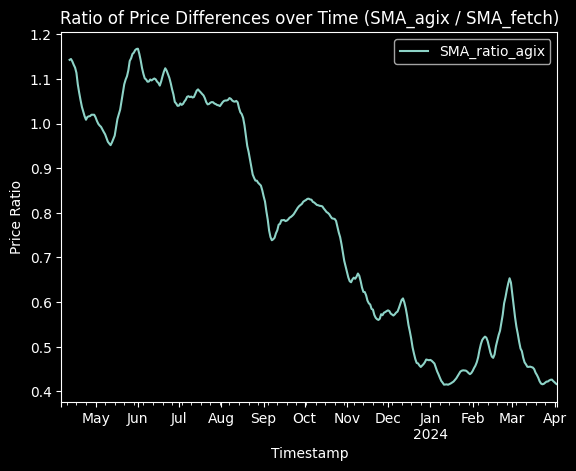

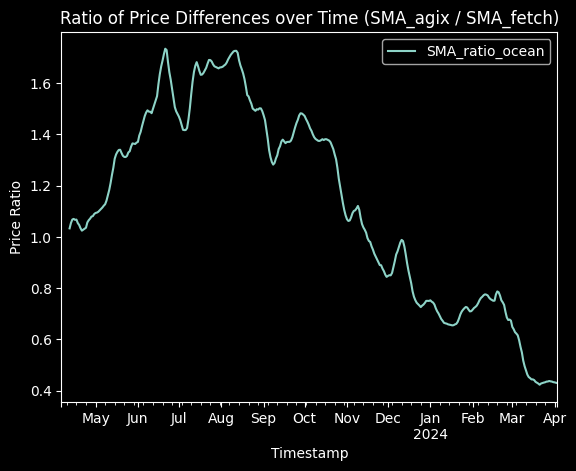

In [6]:
df_merged['SMA_ratio_agix'] = df_merged['SMA_agix']/ df_merged['SMA_fetch']  
df_merged.plot(x='timestamp', y='SMA_ratio_agix', kind='line')
plt.xlabel(xlabel='Timestamp')
plt.ylabel(ylabel='Price Ratio')
plt.title(label='Ratio of Price Differences over Time (SMA_agix / SMA_fetch)')
plt.show()

df_merged['SMA_ratio_ocean'] = df_merged['SMA']/ df_merged['SMA_fetch']  
df_merged.plot(x='timestamp', y='SMA_ratio_ocean', kind='line')
plt.xlabel(xlabel='Timestamp')
plt.ylabel(ylabel='Price Ratio')
plt.title(label='Ratio of Price Differences over Time (SMA_ocean / SMA_fetch)')
plt.show()

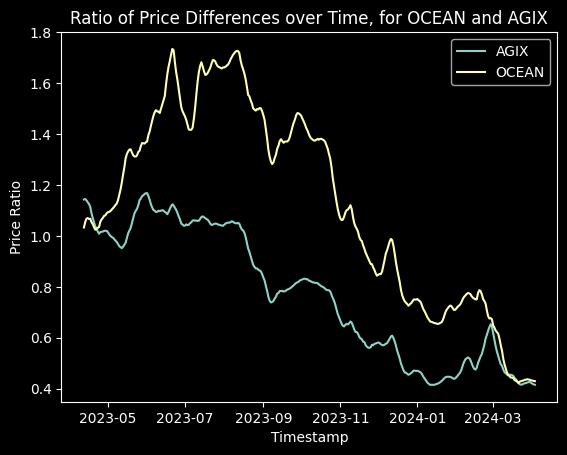

In [7]:

plt.plot(df_merged['timestamp'], df_merged['SMA_ratio_agix'], label='AGIX')
plt.plot(df_merged['timestamp'], df_merged['SMA_ratio_ocean'], label='OCEAN')
plt.xlabel(xlabel='Timestamp')
plt.ylabel(ylabel='Price Ratio')
plt.title(label='Ratio of Price Differences over Time, for OCEAN and AGIX')
plt.legend()
plt.show()

average SMA ratio of OCEAN: 1.1255542536439775
average_price_ratio of AGIX: 0.7706006098076756
